In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2021-07-02 14:53:35--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-07-02 14:53:36 (46.8 MB/s) - ‘helper.py’ saved [2813/2813]



In [ ]:
#Imports here
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import optim, nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import datasets, transforms, models
from PIL import Image
from collections import OrderedDict
import json
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
!unzip "Cat_Dog_data.zip"

In [ ]:
data_dir = "Cat_Dog_data"

In [ ]:
#Transfroms
train_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize(size=256),
                                      transforms.RandomResizedCrop(size=224),
                                      transforms.Normalize([0.485,0.456,0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize(size=256),
                                      transforms.CenterCrop(size=224),
                                      transforms.Normalize([0.485,0.456,0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])

#Loading the datasets with ImageFolder
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transform)

test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transform)

#Loading dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

testloader = torch.utils.data.DataLoader(test_data, batch_size=64)


In [ ]:
model = models.densenet121 (pretrained = True)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# updating classifer in the network
for param in model.parameters(): 
    param.requires_grad = False

classifier = nn.Sequential  (OrderedDict ([
                            ('fc1', nn.Linear (1024, 600)),
                            ('relu1', nn.ReLU ()),
                            ('dropout1', nn.Dropout (p = 0.3)),
                            ('fc2', nn.Linear (600, 100)),
                            ('relu2', nn.ReLU ()),
                            ('dropout2', nn.Dropout (p = 0.3)),
                            ('fc3', nn.Linear (100, 2)),
                            ('output', nn.LogSoftmax (dim =1))
                            ]))
model.classifier = classifier
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [ ]:
epochs = 3
print_every = 20
steps = 0
running_loss = 0

model.to(device)

for e in range(epochs):
  model.train()
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    steps += 1

    optimizer.zero_grad()

    #Forward and Backward Passes
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:
      model.eval()

      with torch.no_grad():

        print("epoch: {}/{}...".format(e+1, epochs),
              "loss: {:.4f}".format(running_loss/print_every))

        running_loss = 0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 1/3... loss: 0.3555
epoch: 1/3... loss: 0.1164
epoch: 1/3... loss: 0.1268
epoch: 1/3... loss: 0.1348
epoch: 1/3... loss: 0.0889
epoch: 1/3... loss: 0.1111
epoch: 1/3... loss: 0.1337
epoch: 1/3... loss: 0.1177
epoch: 1/3... loss: 0.1055
epoch: 1/3... loss: 0.1038
epoch: 1/3... loss: 0.1161
epoch: 1/3... loss: 0.0967
epoch: 1/3... loss: 0.1076
epoch: 1/3... loss: 0.1195
epoch: 1/3... loss: 0.1144
epoch: 1/3... loss: 0.0819
epoch: 1/3... loss: 0.0779
epoch: 2/3... loss: 0.1034
epoch: 2/3... loss: 0.1085
epoch: 2/3... loss: 0.0947
epoch: 2/3... loss: 0.1007
epoch: 2/3... loss: 0.1041
epoch: 2/3... loss: 0.0795
epoch: 2/3... loss: 0.0950
epoch: 2/3... loss: 0.0968
epoch: 2/3... loss: 0.1024
epoch: 2/3... loss: 0.1007
epoch: 2/3... loss: 0.1073
epoch: 2/3... loss: 0.0907
epoch: 2/3... loss: 0.0876
epoch: 2/3... loss: 0.0923
epoch: 2/3... loss: 0.1012
epoch: 2/3... loss: 0.0877
epoch: 2/3... loss: 0.1108
epoch: 2/3... loss: 0.1138
epoch: 3/3... loss: 0.1330
epoch: 3/3... loss: 0.1163
e

In [ ]:
accuracy = 0
test_loss = 0

for images, labels in testloader:
    model.eval()
    with torch.no_grad():
        images, labels = images.to(device), labels.to(device)

        output = model.forward(images)

        test_loss += criterion(output, labels).item()

        ps = torch.exp(output).data
        equality = (labels.data == ps.max(1)[1])

        accuracy += equality.type_as(torch.FloatTensor()).mean()

print("Test Accuracy: {:.3f}%".format(accuracy/len(testloader)*100))

Test Accuracy: 98.242%


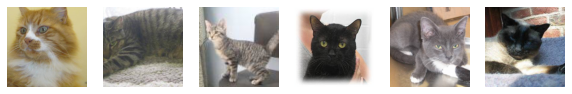

In [ ]:
import helper
model.to('cpu')
model.eval()

data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=6)

for i in range(6):
    ax = axes[i]
    helper.imshow(images[i], ax=ax)

In [ ]:
with torch.no_grad():
    output = model.forward(images)

ps = torch.exp(output)

In [ ]:
random_img = np.random.randint(64, size=1)[0]
random_img

63

In [ ]:
probability = ps[random_img].data.numpy().squeeze()
probability

array([9.999033e-01, 9.664558e-05], dtype=float32)

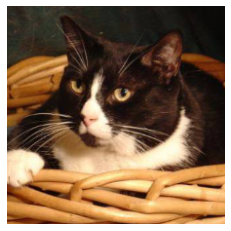

In [ ]:
helper.imshow(images[random_img])

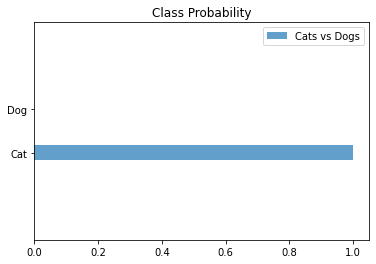

In [ ]:
ind = np.arange(2)
labels = ['Cat', 'Dog',]
width = 0.35
locations = ind

class_probability = plt.barh(ind, probability, width, alpha=.7, label='Cats vs Dogs')

plt.yticks(np.arange(10))
plt.title('Class Probability')
plt.yticks(locations, labels)

#legend
plt.legend()
plt.ylim(top=3)
plt.ylim(bottom=-2)
plt.show();
